<a href="https://colab.research.google.com/github/lucasbens/ML_projects/blob/main/titanic_top_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Project

- The goal of the project is to correctly predict if someone survived the Titanic shipwreck on April 15, 1912.

- In this notebook, I follow a step-by-step workflow to show how I am working through the problem with deep details and visualizations.

<br>

<br>

### Workflow stages:


##### 1) Dataset overview

##### 2) Nan values

##### 3) Data types

##### 4) Data Distribution

##### 5) Numerical features distribution / Target

##### 6) Nominal feature

##### 7) Ordinal features distribution

##### 8) Correlation Matrix



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image


# Setting up max columns & rows displayed to 100
pd.options.display.max_columns = 100
pd.options.display.max_rows = 250

In [ ]:
# Our dataset
df = pd.read_csv('titanic-train.csv')

## 1) Datasets overview

We check our data types & null counts




In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2) Nan Values

In [ ]:
# nb of nan values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# % of nan values
df.isna().sum() / len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**Cabin** has more than 75% Nan values we will drop it


In [ ]:
df.drop('Cabin', axis = 1, inplace =True)

**Conclusion**:

>**Cabin** has ~75% Nan values  ---> Drop it

>**Age** has ~20% Nan values

> **Embarked**  has 2 Nan values    


<br>

We will fill them in the following sections

## 3) Data types

Which features are categorical? numerical?

In [ ]:
df.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

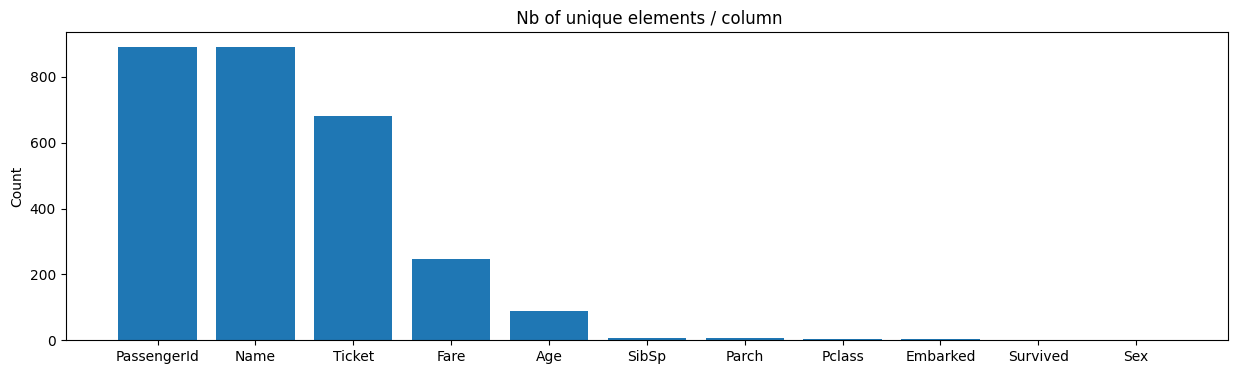

In [ ]:
# bar plot
nb_of_unique = df.nunique().sort_values(ascending=False)

plt.figure(figsize=(15,4))
plt.title(" Nb of unique elements / column")
plt.ylabel('Count')
plt.bar(nb_of_unique.index, nb_of_unique.values)
plt.show()

In [ ]:
num_cols = ['Fare', 'Age']
num_cnt_cols = ['Parch', 'SibSp']
nominal_cols = ['Name', 'PassengerId', 'Ticket', 'Embarked', 'Sex']
ordinal_cols = ['Pclass']
target = ['Survived']

## 4) Data distribution

#### Target distribution _(Survived)_

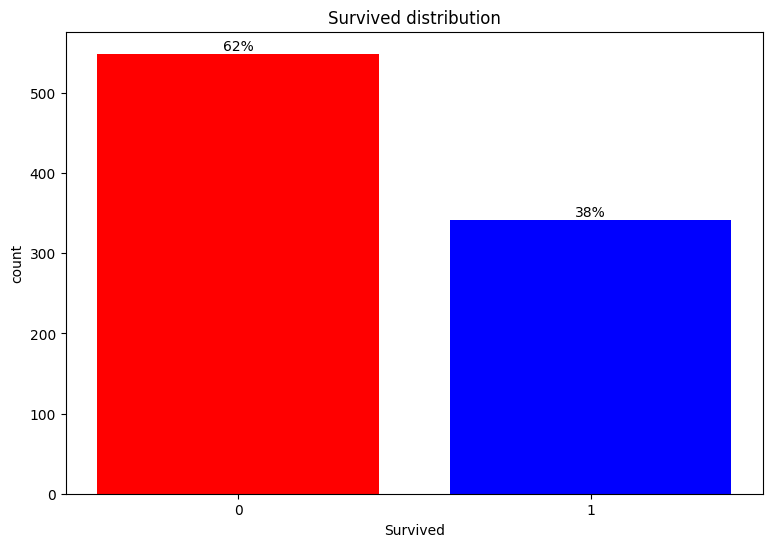

In [ ]:
t = df['Survived'].value_counts(sort=False)

plt.figure(figsize=(9,6))
plt.bar(t.index.astype('str'), t, color = ['r', 'b'])
plt.ylabel('count')
plt.xlabel('Survived')
plt.title('Survived distribution')


# for annotate (optionnal)
for i in t.index:
  plt.annotate("{0:.0f}%".format(t[i]*100/len(df)),xy=(i, t[i]) ,ha='center', va='bottom')
plt.show()

**Observation:**

- 38 % of the passengers survived

#### Numerical features distribution

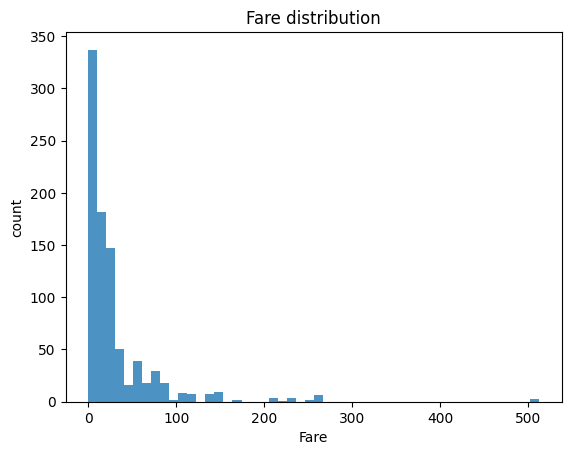

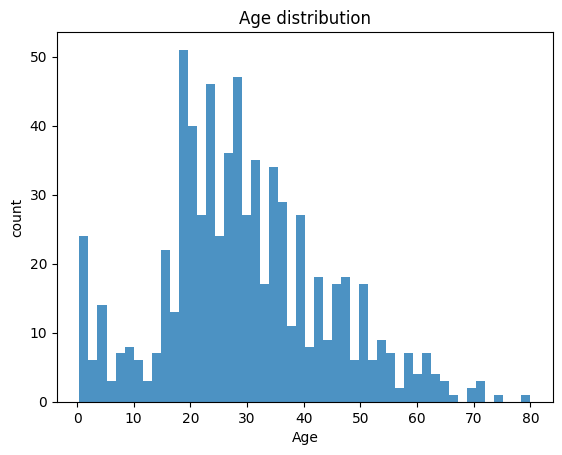

In [ ]:
# histogram without subplots
for col in num_cols:
  plt.hist(df[col], alpha=0.8,bins=50, label =['Train'])
  plt.ylabel('count')
  plt.xlabel(col)
  plt.title(col+' distribution')
  plt.show()

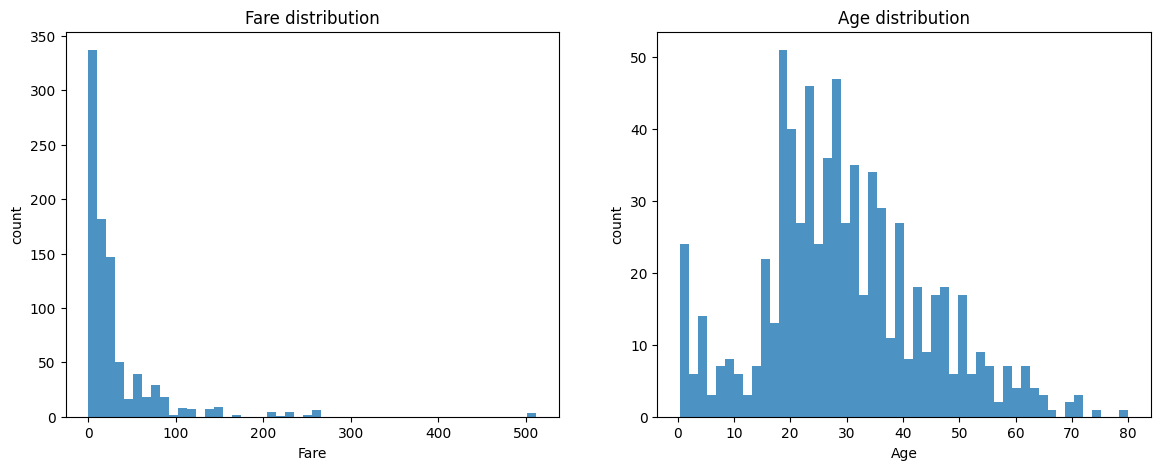

In [ ]:
# histogram with subplots
i=1
plt.figure(figsize=(14,5))

for col in num_cols:
  plt.subplot(1,2,i)
  plt.hist(df[col], alpha=0.8,bins=50, label =['Train'])
  plt.ylabel('count')
  plt.xlabel(col)
  plt.title(col+' distribution')
  i+=1
plt.show()

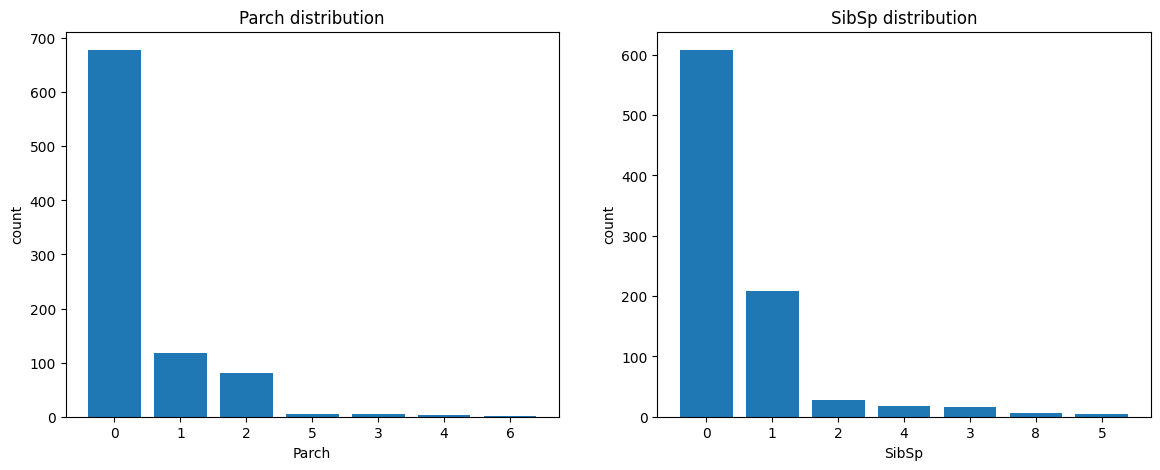

In [ ]:
i=1
plt.figure(figsize=(14,5))

for col in num_cnt_cols:
  plt.subplot(1,2,i)

  t = df[col].value_counts()
  plt.bar(t.index.astype('str'), t)


  plt.ylabel('count')
  plt.xlabel(col)
  plt.title(col+' distribution')
  i+=1

In [ ]:
df[num_cols + num_cnt_cols].describe()

,Fare,Age,Parch,SibSp
count,891.000000,714.000000,891.000000,891.000000
mean,32.204208,29.699118,0.381594,0.523008
std,49.693429,14.526497,0.806057,1.102743
min,0.000000,0.420000,0.000000,0.000000
25%,7.910400,20.125000,0.000000,0.000000
50%,14.454200,28.000000,0.000000,0.000000
75%,31.000000,38.000000,0.000000,1.000000
max,512.329200,80.000000,6.000000,8.000000


**Observations:**

**Parch & SibSp**
> Most of passengers have 0 PARentsCHildren and 0 SIBlingSPouse => Alone.

**Age**
>Most passengers are in 15-35 age range. The average Age is around 30 years.


**Fare**
> We have a *data integrity problem* with some Fare values equal to 0:


## 5) Numerical features distribution / Target

**num_cnt_cols**

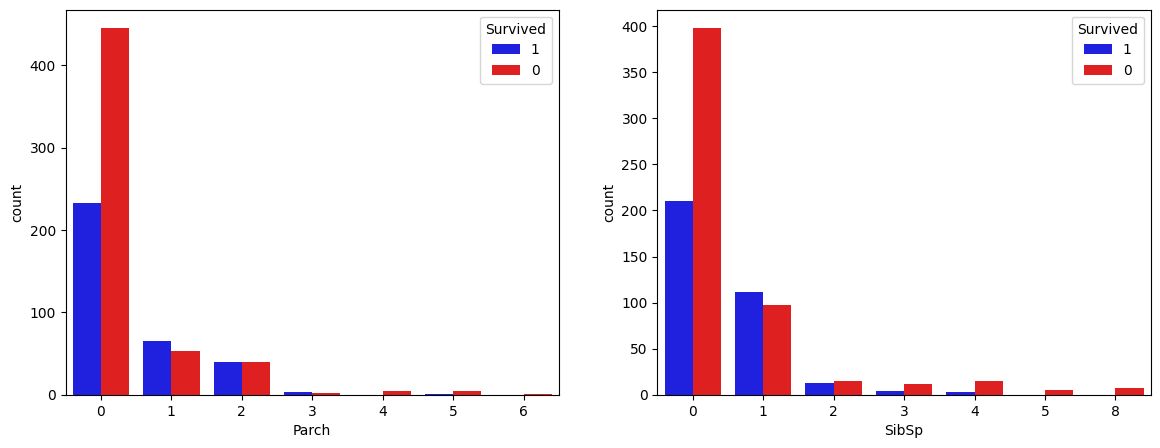

In [ ]:
# count plot with seaborn and HUE

i=1
plt.figure(figsize=(14,5))

for col in num_cnt_cols:
  plt.subplot(1,2,i)
  sns.countplot( x= col, data = df, hue = 'Survived',hue_order=[1,0] ,  palette =['b','r'])
  i+=1

plt.show()

In [ ]:
for col in num_cnt_cols:
  print(df.groupby([col]).Survived.mean(), '\n')

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64 

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64 



**num_cols**

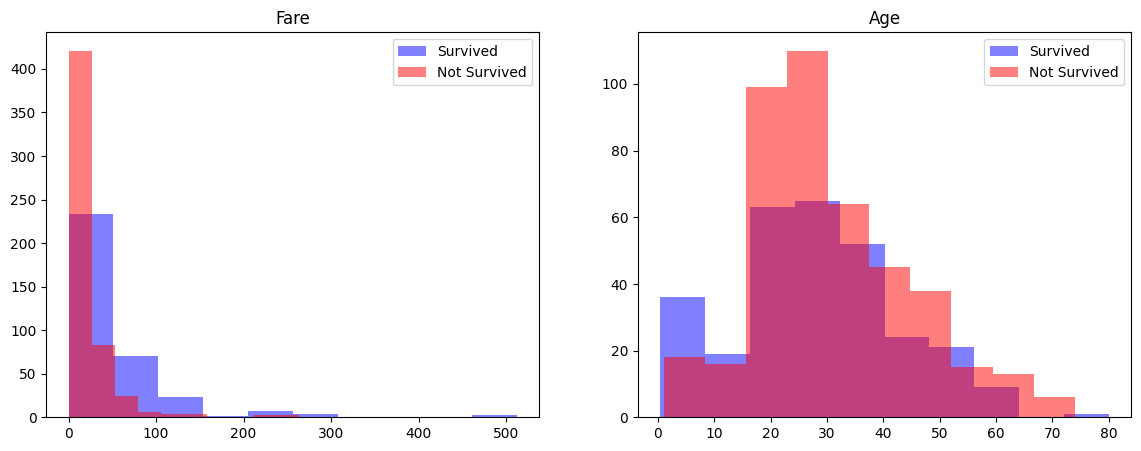

In [ ]:
i=1
plt.figure(figsize=(14,5))

for col in num_cols:
  plt.subplot(1,2,i)
  plt.hist(df[col].loc[df['Survived']==1], alpha=0.5, color='b', label ='Survived')
  plt.hist(df[col].loc[df['Survived']==0],alpha=0.5, color='r', label ='Not Survived')
  i+=1
  plt.legend()
  plt.title(col)
plt.show()

**Observations:**

- Lowcost passengers, Alone passenger and big famillies have the worst survival rate we will go further below using Pclass variable

- Premium passengers, Children, old (>70) passengers  and small famillies have higher survival rate





## 6) Nominal features

In [ ]:
df[nominal_cols].describe(include='O')

,Name,Ticket,Embarked,Sex
count,891,891,889,891
unique,891,681,3,2
top,"Braund, Mr. Owen Harris",347082,S,male
freq,1,7,644,577


We have too many unique values to plot the distribution of **Name** and **Ticket**

In [ ]:
# overview of 'Name','Ticket'
df[['Name','Ticket']].head()

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


#### Nominal features distribution / Target

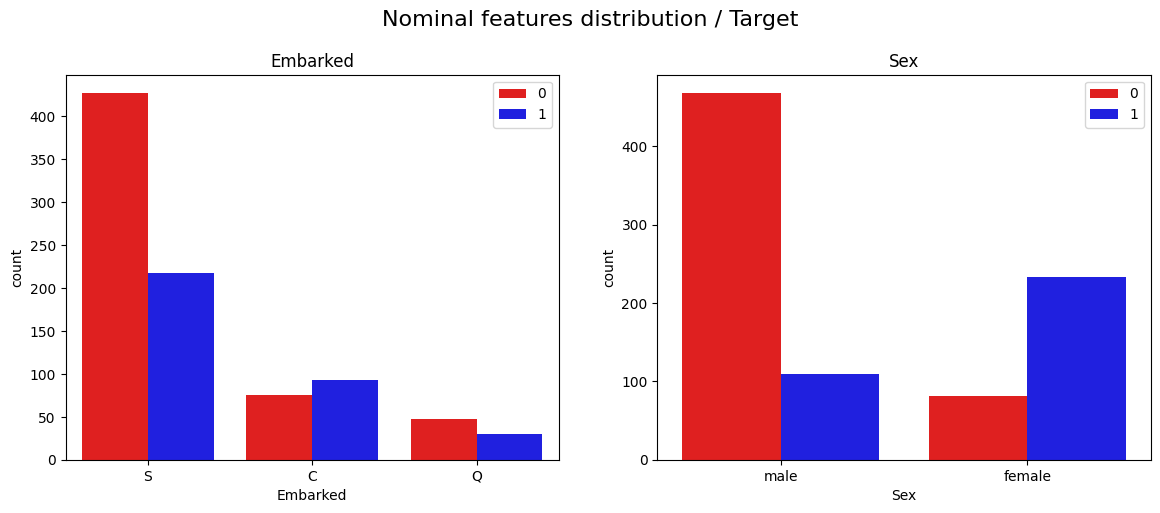

In [ ]:
plt.figure(figsize=(14,5))
i=1

for col in ['Embarked', 'Sex']:
  plt.subplot(1,2,i)
  sns.countplot(x= col, data = df, hue = 'Survived',  palette =['r','b'])
  plt.legend(loc='upper right')
  plt.title(col)
  i+=1

plt.suptitle('Nominal features distribution / Target', fontsize=16,y=1.01)
plt.show()

In [ ]:
print('\tSurvival rate\n')

for col in ['Embarked', 'Sex']:
  print(df.groupby([col]).Survived.mean(), '\n')

	Survival rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64 

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 



In [ ]:
pd.crosstab(df['Embarked'],df['Pclass'] )

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


**Observations:**

- Male passengers have a terrible survival rate (80% died) and female a great one (74% survived)
-Embarked survival rate is related the Pclass passenger.
For example Passengers have embarked from C have higher survival rate (55%) because many of them are in first class.



## 7) Ordinal features distribution

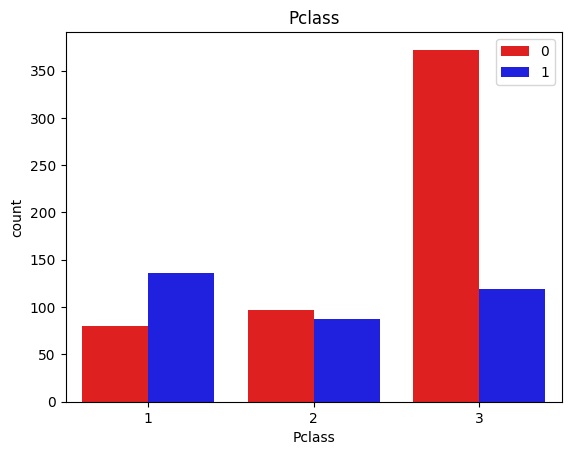

In [ ]:
col = 'Pclass'

sns.countplot(x= col, data = df, hue = 'Survived',  palette =['r','b'])
plt.legend(loc='upper right')
plt.title(col)
plt.show()

Observations:

- Better the Pclass is, greater is the survival rate. It comfirms our observation above on lowcost passenger

## 8) Correlation matrix

<ipython-input-27-4966c3af1243>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,annot = True, fmt = '.2f')


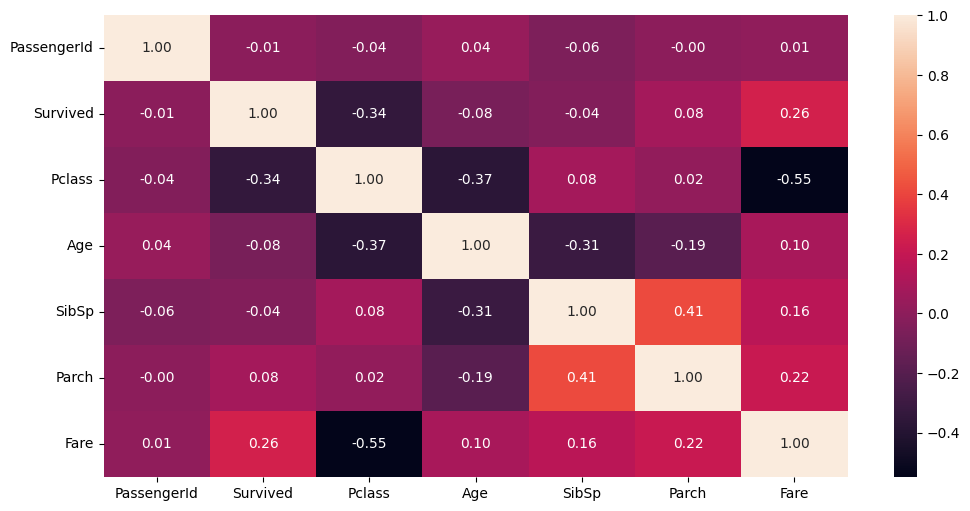

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr() ,annot = True, fmt = '.2f')
plt.show()